In [1]:
!pip install "numpy < 2.0"

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preparation**

In [4]:
production_log = pd.read_csv(r'C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Production_Log_01.csv')
machine_settings = pd.read_csv(r'C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Machine_Settings_Log_01.csv')

In [5]:
production_log.head(2)

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181
1,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858


In [6]:
machine_settings.head(2)

,configuration_log_ID,gear,rotation_speed
0,1,2,122.121415
1,2,1,111.977476


In [8]:
df_original = machine_settings.set_index('configuration_log_ID').join(production_log.set_index('configuration_log_ID'), how = 'inner')

In [9]:
df_original.head(2)

,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,...,8.370683e+08,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181
2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,...,4.355043e+08,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858


**Removing all post-production values and keeping only features available pre-production**

In [11]:
df_original.drop(columns = ['weight_in_kg','weight_in_g','error_type','Quality','reflectionScore','distortion','nicesness','smartness','multideminsionality', 'roughness'], axis = 1, inplace = True)

In [12]:
df_original.head(2)

,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,error
configuration_log_ID,,,,,,,,,,,
1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,no
2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,no


In [13]:
df_copy = df_original.copy(deep = True)

<hr>

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gear              10000 non-null  int64  
 1   rotation_speed    10000 non-null  float64
 2   id                10000 non-null  int64  
 3   width             10000 non-null  float64
 4   height            10000 non-null  float64
 5   ionizationclass   10000 non-null  object 
 6   FluxCompensation  10000 non-null  object 
 7   pressure          10000 non-null  float64
 8   karma             10000 non-null  float64
 9   modulation        10000 non-null  float64
 10  error             10000 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 937.5+ KB


In [16]:
df_copy.isna().sum()

gear                0
rotation_speed      0
id                  0
width               0
height              0
ionizationclass     0
FluxCompensation    0
pressure            0
karma               0
modulation          0
error               0
dtype: int64

In [17]:
df_copy.isnull().sum()

gear                0
rotation_speed      0
id                  0
width               0
height              0
ionizationclass     0
FluxCompensation    0
pressure            0
karma               0
modulation          0
error               0
dtype: int64

<hr>

## **Target Variable Analysis and EDA**

In [20]:
target = df_copy['error']
target.value_counts()

error
no     6635
yes    3365
Name: count, dtype: int64

In [21]:
target.dtype

dtype('O')

In [22]:
target_counts = target.value_counts()
target_percentages = target.value_counts(normalize = True) * 100
# normalize shows the proportion of values; the relative frequency
print(target_percentages)

error
no     66.35
yes    33.65
Name: proportion, dtype: float64


In [23]:
target_counts

error
no     6635
yes    3365
Name: count, dtype: int64

C:\Users\agrim\AppData\Local\Temp\ipykernel_37792\4092993701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


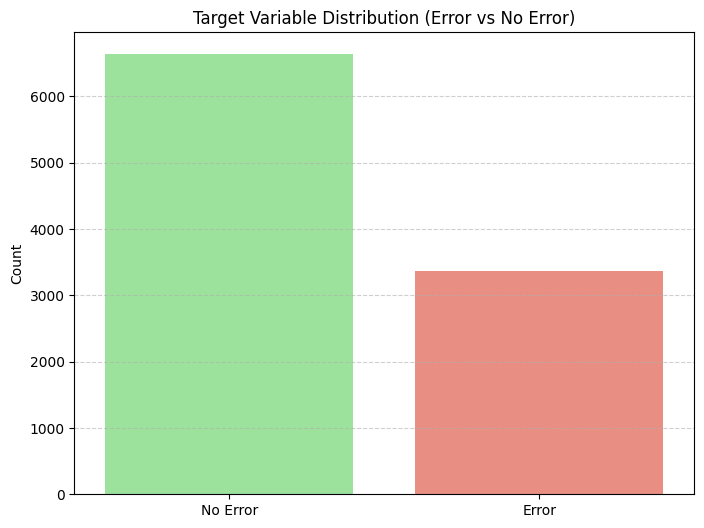

In [24]:
plt.figure(figsize = (8,6))

sns.barplot(
    x = target_counts.index.map({'no': 'No Error', 'yes': 'Error'}),
    y = target_counts.values,
    palette = ['lightgreen','salmon']
)

plt.title("Target Variable Distribution (Error vs No Error)")
plt.ylabel("Count")
plt.xlabel("")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

In [25]:
df_copy.drop(columns = ['id'], inplace = True, axis = 1)

In [26]:
numeric_features = df_copy.select_dtypes(include = ['int64', 'float64'])
numeric_features.columns

Index(['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma',
       'modulation'],
      dtype='object')

**Numeric Features vs Error**

<Figure size 500x400 with 0 Axes>

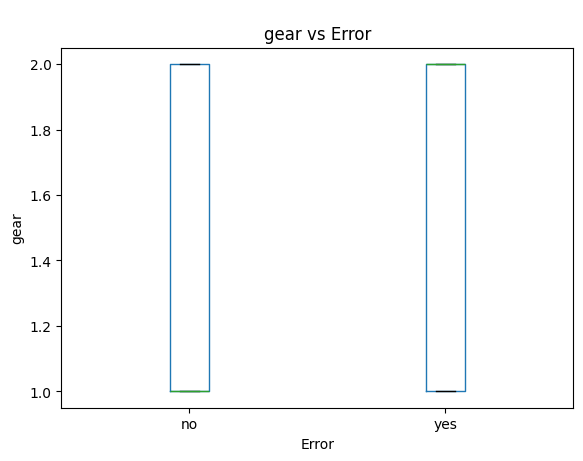

<Figure size 500x400 with 0 Axes>

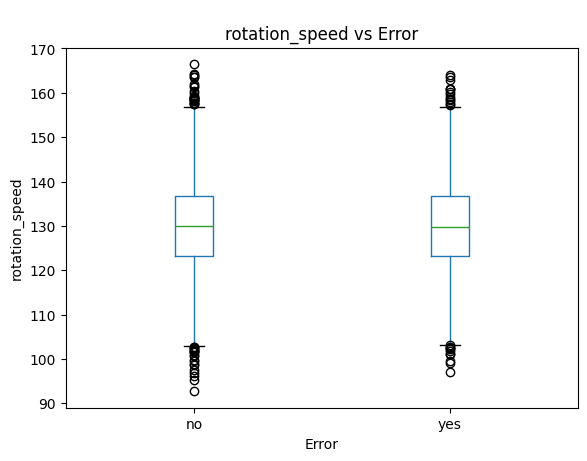

<Figure size 500x400 with 0 Axes>

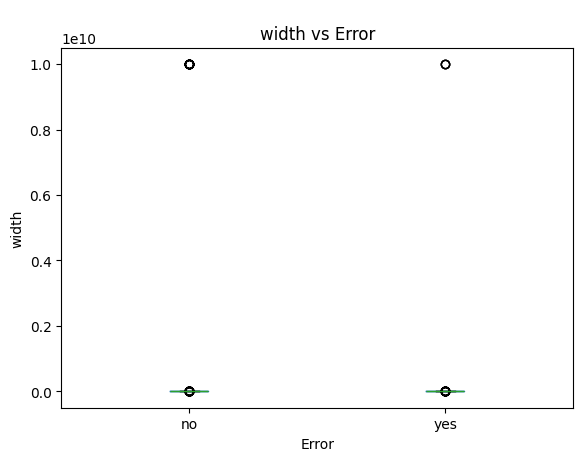

<Figure size 500x400 with 0 Axes>

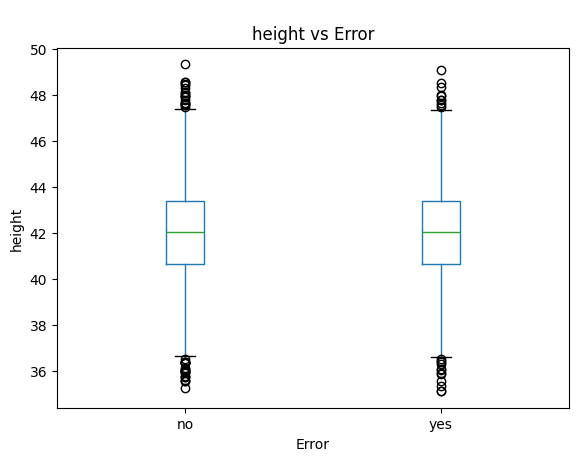

<Figure size 500x400 with 0 Axes>

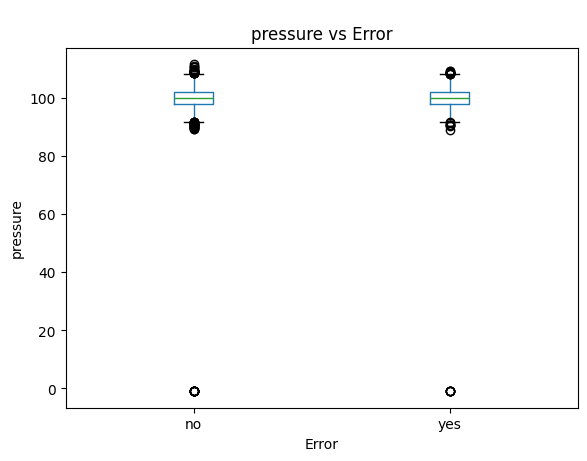

<Figure size 500x400 with 0 Axes>

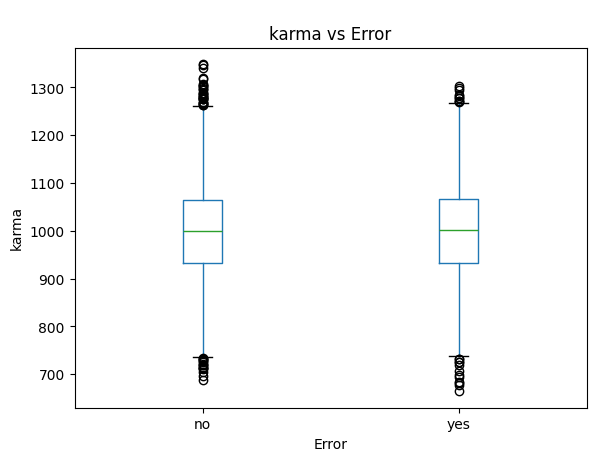

<Figure size 500x400 with 0 Axes>

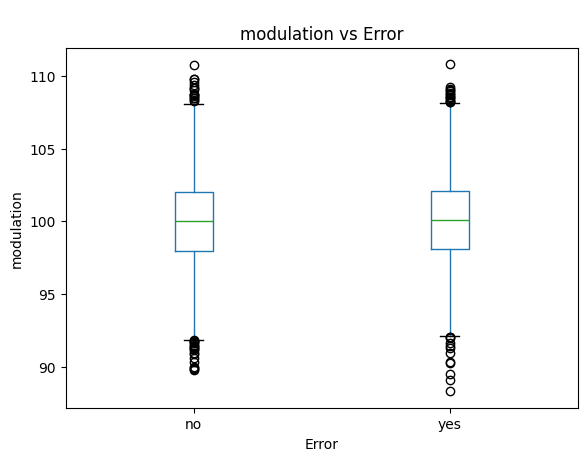

In [87]:
for col in numeric_features.columns:
    plt.figure(figsize = (5,4))
    df_copy.boxplot(column = col, by = 'error', grid = False, )  # by is what goes on x-axis and col is what goes on y-axis
    plt.title(f'{col} vs Error')
    plt.suptitle(' ')
    plt.xlabel('Error')
    plt.ylabel(col)
    plt.show()

**Categorical Feature vs Error**

In [30]:
cat_cols = df_copy.select_dtypes(include = ['object'])
cat_cols.columns

Index(['ionizationclass', 'FluxCompensation', 'error'], dtype='object')

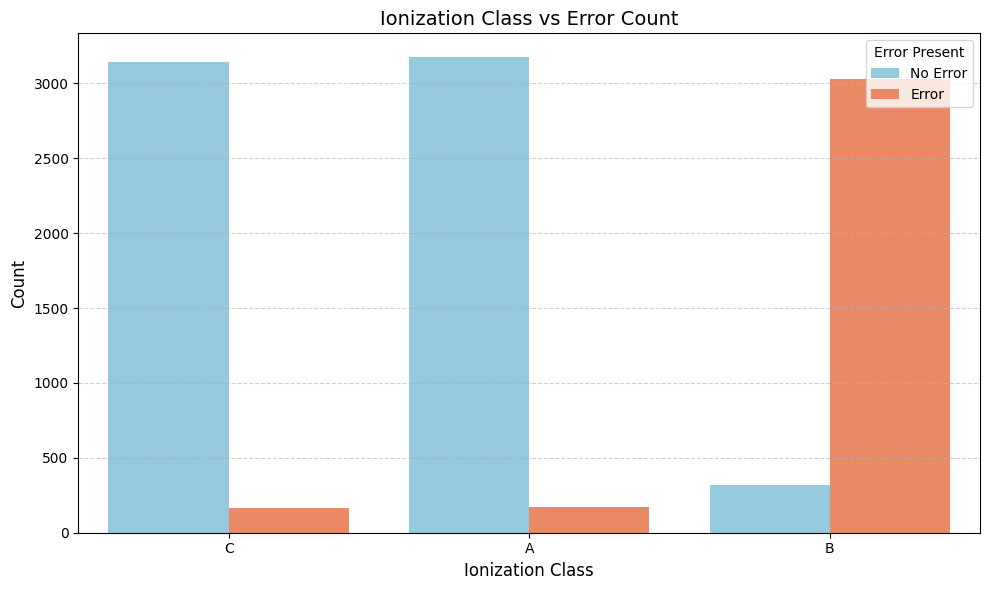

In [31]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data = df_copy,
    x = 'ionizationclass',
    hue = 'error',
    palette = ['skyblue', 'coral']
)

plt.title('Ionization Class vs Error Count', fontsize = 14)

plt.xlabel('Ionization Class', fontsize = 12)

plt.ylabel('Count', fontsize=12)

plt.legend(title = 'Error Present', labels=['No Error', 'Error'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

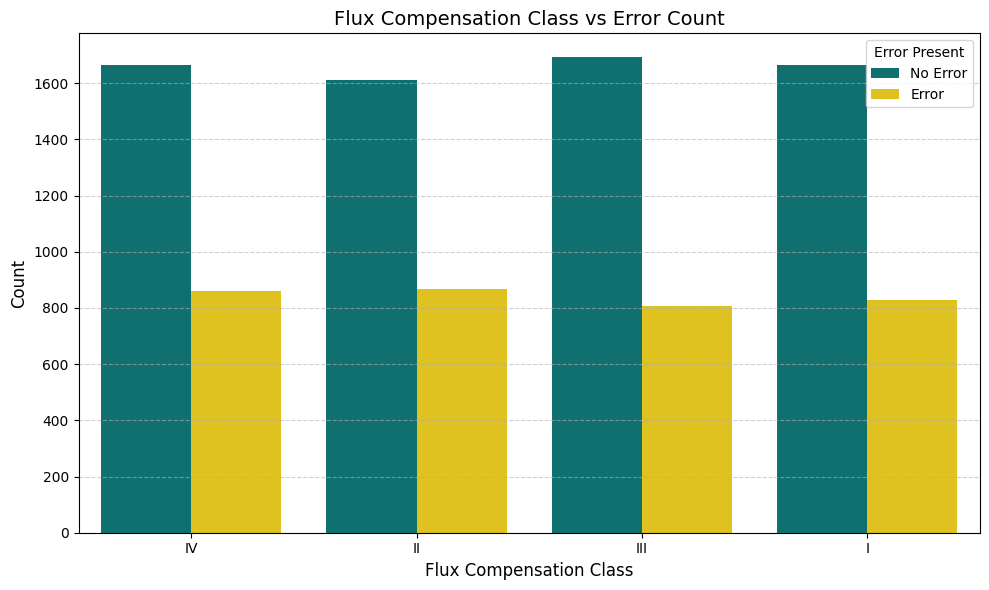

In [32]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data = df_copy,
    x = 'FluxCompensation',
    hue = 'error',
    palette = ['teal', 'gold']
)

plt.title('Flux Compensation Class vs Error Count', fontsize = 14)

plt.xlabel('Flux Compensation Class', fontsize = 12)

plt.ylabel('Count', fontsize = 12)

plt.legend(title = 'Error Present', labels=['No Error', 'Error'])
plt.grid(axis='y', linestyle='--', alpha = 0.6)

plt.tight_layout()
plt.show()

The dimensional features like width, height, and karma show heavy overlap between faulty and non-faulty products, indicating they may not be useful predictors of error; instead, the model's predictive power mmaybe relies on the categorical features like ionizationclass and FluxCompensation to identify errors.

<hr>

## **Encoding + Model Training**

In [36]:
# encoding categorical features

df_encoded = pd.get_dummies(df_copy, columns = ['FluxCompensation', 'ionizationclass'], drop_first = True)
df_encoded.head(2)

,gear,rotation_speed,width,height,pressure,karma,modulation,error,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV,ionizationclass_B,ionizationclass_C
configuration_log_ID,,,,,,,,,,,,,
1,2,122.121415,137.419169,44.326218,103.937207,976.538993,98.309438,no,False,False,True,False,True
2,1,111.977476,98.706037,41.619531,101.177877,1031.806826,102.748068,no,True,False,False,False,False


In [37]:
from sklearn.model_selection import train_test_split

Y = df_encoded['error']
Y.shape

(10000,)

In [38]:
df_encoded.drop(columns = ['error'], axis = 1, inplace = True)

In [39]:
df_encoded.columns

Index(['gear', 'rotation_speed', 'width', 'height', 'pressure', 'karma',
       'modulation', 'FluxCompensation_II', 'FluxCompensation_III',
       'FluxCompensation_IV', 'ionizationclass_B', 'ionizationclass_C'],
      dtype='object')

In [40]:
X = df_encoded

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 50, stratify = Y)

# stratify ensures that the resulting training and testing sets have the same proportion of classes as the original dataset.
# useful also if class has significant imbalance.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier( n_estimators = 200, max_depth = 10, random_state = 50, class_weight = 'balanced', n_jobs = -1)

# The model applies extra penalty to mistakes on the minority class so it becomes more sensitive to detecting error cases.
# minor class is the class that shows up much less in the data than the other classes.

In [43]:
rf_classifier.fit(X_train, Y_train)
Y_predicted = rf_classifier.predict(X_test)
Y_predicted.shape

(2000,)

## **Model Evaluation**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print("--- Classification Report ---")
print(classification_report(Y_test, Y_predicted))

--- Classification Report ---
              precision    recall  f1-score   support

          no       0.95      0.96      0.96      1327
         yes       0.92      0.90      0.91       673

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



--- Confusion Matrix ---


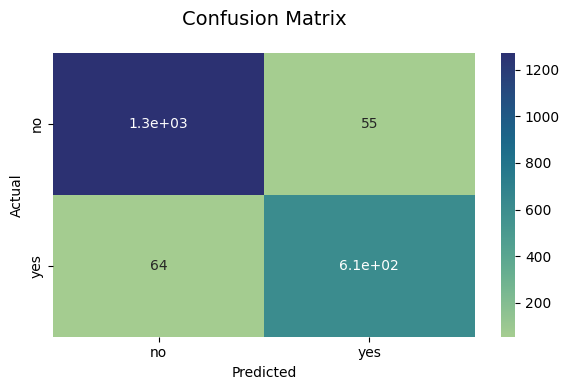

In [47]:
print("--- Confusion Matrix ---")

classes = ["no", 'yes']

cm = confusion_matrix(Y_test, Y_predicted, labels = classes)

plt.figure(figsize = (6,4))
sns.heatmap( cm, annot = True, cmap = 'crest', xticklabels = classes, yticklabels = classes)
plt.title('Confusion Matrix', pad = 20, fontsize = 14, )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

- Top-left (1300) → True Negatives (TN): The model correctly predicted "no" when it really was "no".

- Top-right (55) → False Positives (FP): The model predicted "yes" but it was actually "no".

- Bottom-left (64) → False Negatives (FN): The model predicted "no" but it was actually "yes".

- Bottom-right (610) → True Positives (TP): The model correctly predicted "yes" when it really was "yes".

- The confusion matrix shows how well the model predicted the classes. Most "no" samples (≈1300) were correctly predicted, and most "yes" samples (≈610) were also correctly predicted. There are some mistakes: 55 "no" were predicted as "yes," and 64 "yes" were predicted as "no." Overall, the model performs reasonably well, with slightly more errors on the "yes" class.

<hr>